# BUSINESS UNDERSTANDING

## PROBLEM STATEMENT
Customer churn poses a major threat to revenue and customer lifetime value for internet service providers. While retaining current customers is far more cost-efficient than attracting new ones, pinpointing those at risk of leaving continues to be a persistent challenge.

>This project seeks to build a predictive machine learning model that calculates churn risk scores and flags high-risk customers by integrating behavioral, demographic, and feedback data.

## OBJECTIVES
To develop a supervised machine learning model that predicts customer churn risk for internet service providers, leveraging behavioral, transactional, and feedback data.

>*Goal*: Enable companies to identify customers at high risk of churning, facilitating timely and targeted retention strategies.

This analysis seeks to address the following key business questions:

- Which *customer segments* exhibit the highest churn rates?
- What are the primary *behavioral or demographic* predictors of churn?
- Can *sentiment in customer feedback* enhance churn risk prediction?
- How effective are existing *loyalty strategies* at retaining customers?
- What *actionable retention strategies* can be developed from profiles of high-churn-risk customers?

# DATA UNDERSTANDING

In [4]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import log_loss
from scipy.stats import uniform, randint
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load dataset 
df = pd.read_csv("churn.csv")

In [3]:
#Displaying the first 5 columns
df.head()

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,XW0DQ7H,Village,Platinum Membership,17-08-2017,No,xxxxxxxx,Gift Vouchers/Coupons,?,...,300.63,53005.25,17,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,5K0N3X1,City,Premium Membership,28-08-2017,?,CID21329,Gift Vouchers/Coupons,Desktop,...,306.34,12838.38,10,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,1F2TCL3,Town,No Membership,11-11-2016,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,516.16,21027.00,22,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,37,M,VJGJ33N,City,No Membership,29-10-2016,Yes,CID3793,Gift Vouchers/Coupons,Desktop,...,53.27,25239.56,6,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,31,F,SVZXCWB,City,No Membership,12-09-2017,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,...,113.13,24483.66,16,663.06,No,Yes,Yes,Solved,Poor Website,1


In [4]:
#Getting the shape of dataframe
df.shape

(36992, 23)

In [5]:
# Displaying all columns that exist in our dataframe
df.columns

Index(['age', 'gender', 'security_no', 'region_category',
       'membership_category', 'joining_date', 'joined_through_referral',
       'referral_id', 'preferred_offer_types', 'medium_of_operation',
       'internet_option', 'last_visit_time', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')

In [6]:
#Trying to understand the data types in our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   security_no                   36992 non-null  object 
 3   region_category               31564 non-null  object 
 4   membership_category           36992 non-null  object 
 5   joining_date                  36992 non-null  object 
 6   joined_through_referral       36992 non-null  object 
 7   referral_id                   36992 non-null  object 
 8   preferred_offer_types         36704 non-null  object 
 9   medium_of_operation           36992 non-null  object 
 10  internet_option               36992 non-null  object 
 11  last_visit_time               36992 non-null  object 
 12  days_since_last_login         36992 non-null  int64  
 13  a

In [7]:
#Understanding the distribution of values in the dataframe
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,0.540982
std,15.867412,228.819900,398.289149,19444.806226,194.063624,0.498324
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,0.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,0.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,1.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,1.000000


In [8]:
#Standardizing the column names by converting them to lowercase and replacing spaces with underscores.
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [9]:
# Checking for missing values
df.isnull().sum()

age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

## DATA CLEANING

We begin with the **`preferred_offer_types`** column. The percentage of null values in this column is **0.77%**, which is negligible.  
To maintain data quality and consistency, we will drop all rows containing null values in this column.


In [11]:
df.drop(columns=['security_no', 'last_visit_time', 'referral_id', 'age'], inplace=True)
print(df.columns)

Index(['gender', 'region_category', 'membership_category', 'joining_date',
       'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score'],
      dtype='object')


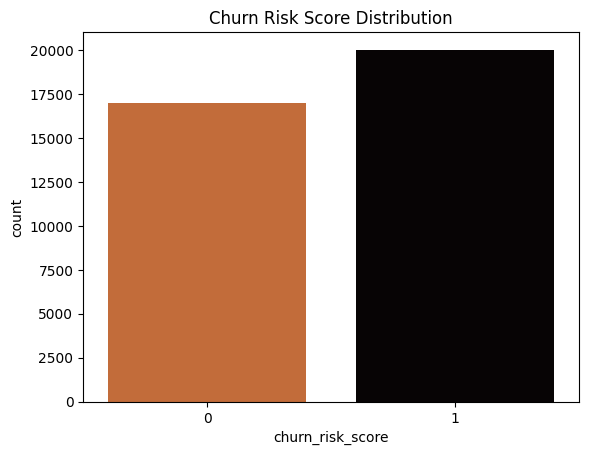

In [19]:
# Target distribution
custom_palette = {'0': "#d96623", '1': "#070405"}
sns.countplot(x='churn_risk_score', data=df, palette=custom_palette)
plt.title("Churn Risk Score Distribution")
plt.show()

The chart reveals that category 1 churn risk scores slightly outnumber those in category 0. This implies that more customers are at risk of leaving the company than staying.

We will employ a heatmap to visualize correlations among our numerical variables. This approach will help identify which features—such as `tenure_days` or `feedback_sentiment`—show the strongest associations with `churn_risk_score` when selecting model inputs.

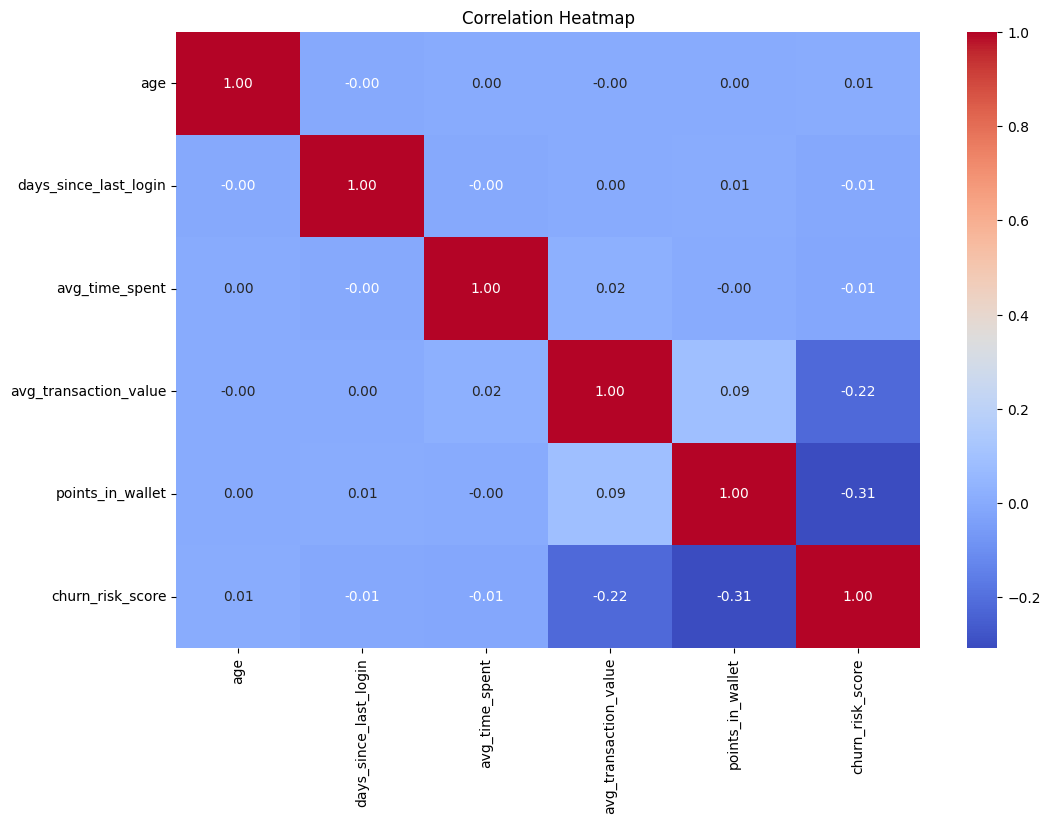

In [20]:
# Correlation heatmap
numerical_features = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

It appears that the numerical variables do not exhibit a strong correlation.


A histogram will be used to display the distribution of customer wallet points. This visualization will help us determine whether most customers hold low, average, or high points. It also provides insights into potential outliers or patterns that could influence churn.


In [21]:
# Our date column has dates recorded in different formats. To convert to datetime, we will use a date_parser
date_parser = lambda x: pd.to_datetime(x, format='mixed', dayfirst=True)
df['joining_date'] = df['joining_date'].apply(date_parser)

To support the analysis of seasonal and monthly churn patterns, we will separate this column into two fields: month and year.


In [22]:
# Feature engineering a column for month and year
df['joining_year'] = df['joining_date'].dt.year
df['joining_month'] = df['joining_date'].dt.month

We will examine the number of signups throughout the data collection period.


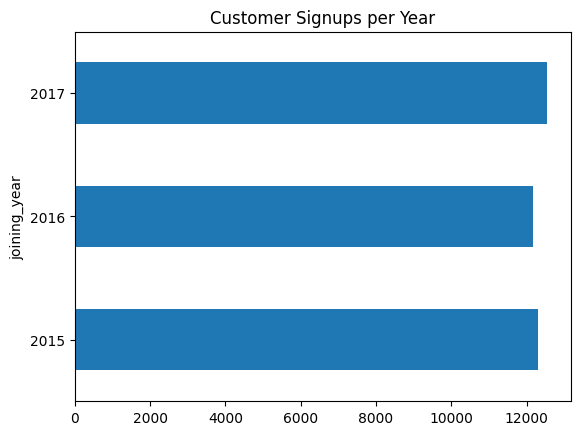

In [23]:
# Customer Signups Over Time
# bar plot of number of users joining per year.
df.groupby('joining_year').size().plot(kind='barh', title='Customer Signups per Year');

The bar graph shows that customer signups averaged slightly above 12,000, with 2017 recording the highest number among the three years.


We will check monthly signup trend.

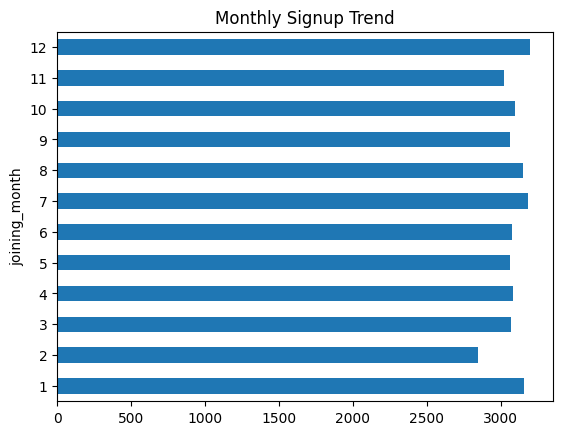

In [24]:
# Monthly Signup Trend (across all years)
# Group by joining_month to see seasonality.
df.groupby('joining_month').size().plot(kind='barh', title='Monthly Signup Trend');

The bar graph indicates that the peak signup months were January, July, and December. This trend is likely influenced by holiday seasons during these months. The product appears to sell more, possibly due to incentives such as discounts offered during the festive period. To validate this, we will plot a bar graph using the special discount column.


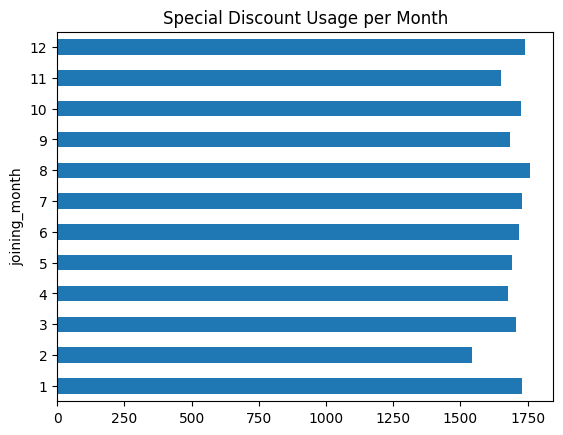

In [25]:
# Monthly Trend of Special Discount Usage

special_discount = df[df['used_special_discount'] == 'Yes']
special_discount.groupby('joining_month').size().plot(kind='barh', title='Special Discount Usage per Month');

The bar graph above supports our assumption, showing that special discount usage aligns with our earlier observations.


We are going to do analysis of the average transaction value over the three year period

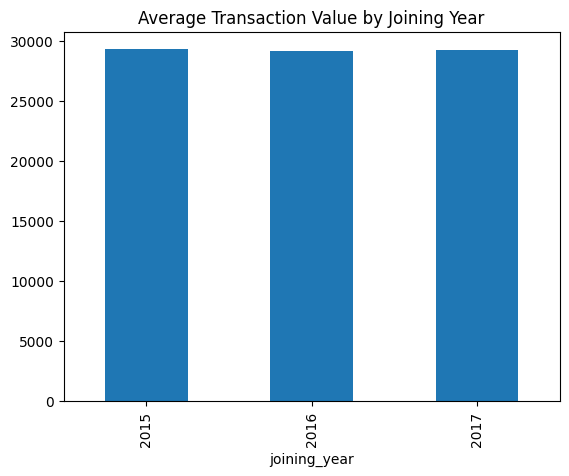

In [26]:
# User Behavior Over Time
df.groupby('joining_year')['avg_transaction_value'].mean().plot(kind='bar',title='Average Transaction Value by Joining Year');

The average transaction value remains relatively stable, ranging between 25,000 and 30,000 over the data collection period. Next, we will examine how this value is distributed across different regions and age groups, and how it relates to churn.


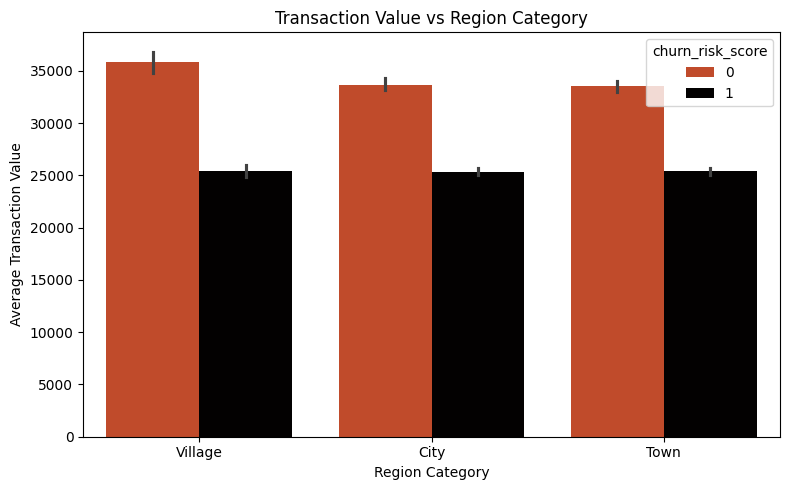

In [27]:
plt.figure(figsize=(8, 5))
custom_palette = {0: "#d93d12", 1: "#030101"}
sns.barplot(data=df, x='region_category', y='avg_transaction_value', hue='churn_risk_score', palette=custom_palette)
plt.title('Transaction Value vs Region Category')
plt.xlabel('Region Category')
plt.ylabel('Average Transaction Value')
plt.tight_layout()
plt.show()

The village demographic appears to have the highest average transaction value, followed by the city and then the town categories. 

Next, we will analyze how this value is distributed across different age groups.


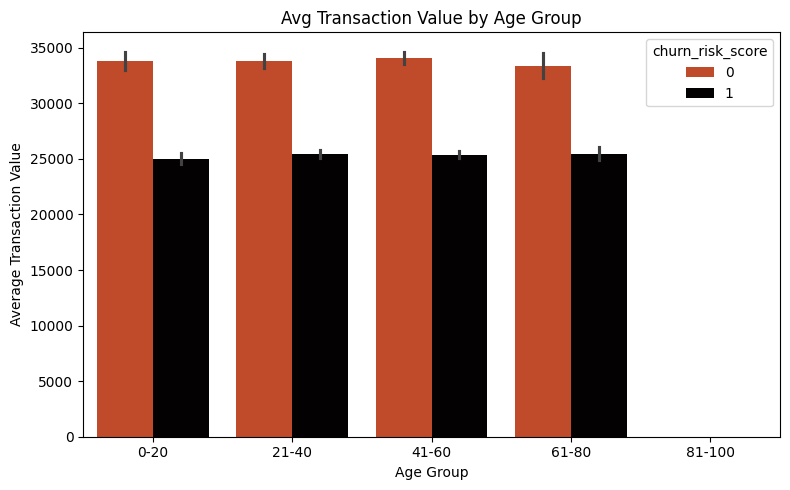

In [28]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='age_group', y='avg_transaction_value', hue='churn_risk_score', palette=custom_palette)
plt.title('Avg Transaction Value by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Transaction Value')
plt.tight_layout()
plt.show()

Average transanction value is evenly distributed across the age groups.

We will check the churn and complaints trends over time.

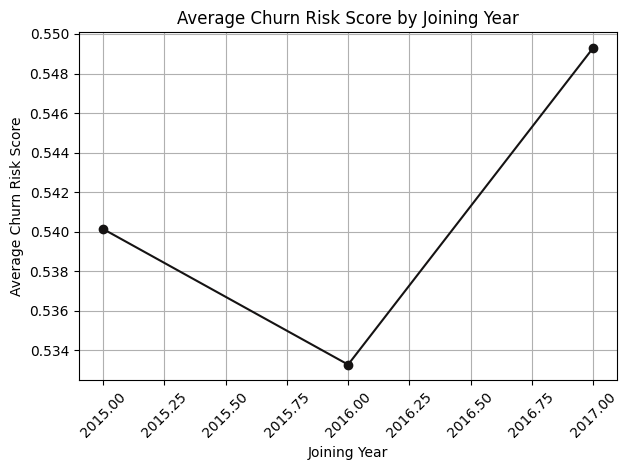

In [29]:
# Churn Risk Score by Year

df.groupby('joining_year')['churn_risk_score'].mean().plot(
    kind='line',
    marker='o',
    color="#151313",
    title='Average Churn Risk Score by Joining Year'
)

plt.xlabel('Joining Year')
plt.ylabel('Average Churn Risk Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The churn risk score declined in 2016 but rose again in 2017. However, no clear upward or downward trend is observed, indicating that the year of customer acquisition does not significantly affect churn likelihood. Further analysis could investigate whether specific months, seasons, or other time-related factors have a stronger influence on churn risk.


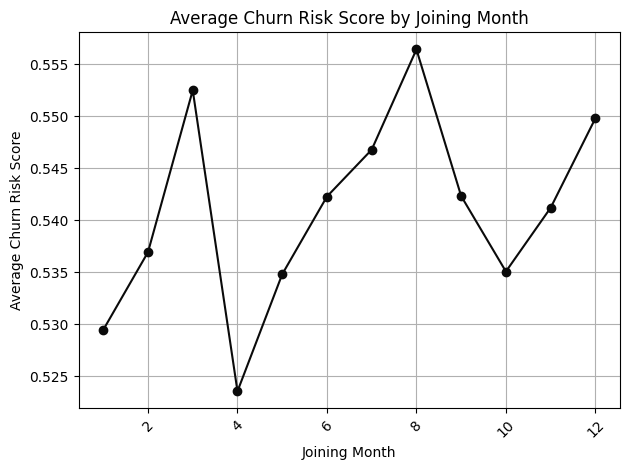

In [30]:
# Churn Risk Score by Month
df.groupby('joining_month')['churn_risk_score'].mean().plot(
    kind='line',
    marker='o',
    color="#0a0a0a",
    title='Average Churn Risk Score by Joining Month'
)

plt.xlabel('Joining Month')
plt.ylabel('Average Churn Risk Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

The lack of a clear upward or downward trend indicates that the month of joining does not consistently influence a customer’s likelihood of churning. However, the observed fluctuations suggest possible seasonal or month-specific effects that merit further exploration. Notably, March and August show the highest churn risk.


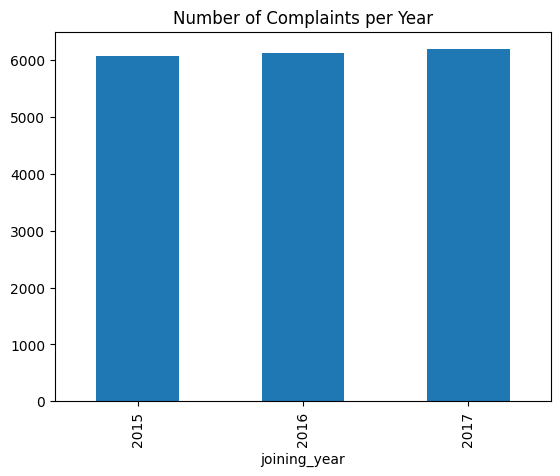

In [31]:
#Checking the trend of complaints over the period of years the data was collected
complaints_by_year = df[df['past_complaint'] == 'Yes'].groupby('joining_year').size()
complaints_by_year.plot(kind='bar', title='Number of Complaints per Year');

The bar graph above shows that the number of complaints averaged slightly above 6,000 over the three-year period.


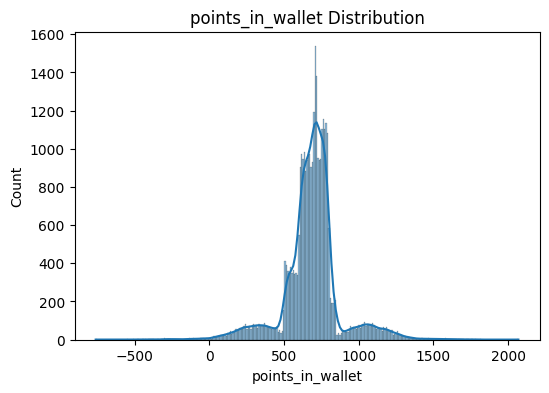

In [32]:
# Numerical distributions
for col in ['points_in_wallet']:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True,palette='Set1')
    plt.title(f"{col} Distribution")
    plt.show()

The graph above shows a uniform distribution. 

Next, we will examine the relationship between wallet points and churn risk to assess how financial incentives influence customer spending.


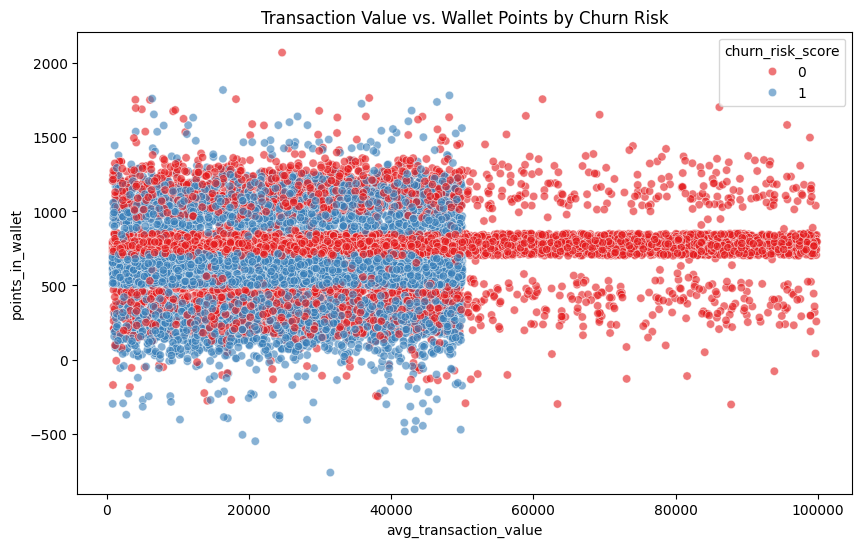

In [33]:
## Avg Transaction Value vs. Points in Wallet (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x='avg_transaction_value', y='points_in_wallet',
    hue='churn_risk_score', palette='Set1', alpha=0.6
)
plt.title('Transaction Value vs. Wallet Points by Churn Risk')
plt.show()

Although transaction values range widely from near 0 to over 90,000, most customers cluster around mid-range wallet points (approximately 500 to 1,000). Notably, customers with low churn risk appear more concentrated at specific wallet point thresholds—such as 500 and 1,000—suggesting the presence of reward or loyalty milestones that support retention. In contrast, churn-risk customers are more widely dispersed, showing weaker alignment with these thresholds. This pattern suggests that encouraging higher or more structured wallet point accumulation could help reduce churn risk.


The below graph shows membership category against churn risk score.

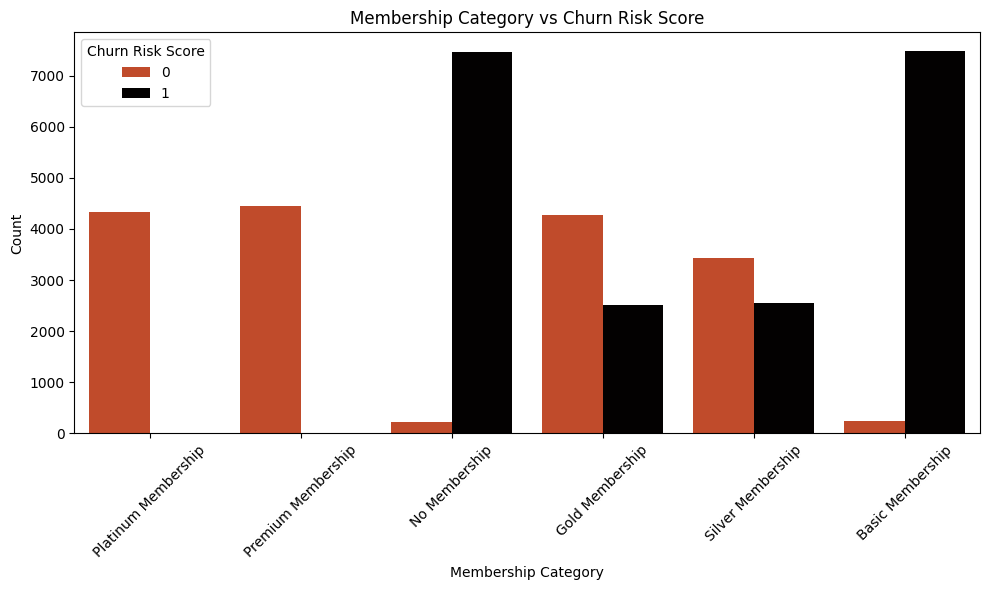

In [34]:
# Plot count of membership category vs churn risk score
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='membership_category', hue='churn_risk_score',palette=custom_palette)

# Visuals
plt.title("Membership Category vs Churn Risk Score")
plt.xlabel("Membership Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Churn Risk Score")
plt.tight_layout()
plt.show()

The graph shows that customers with basic memberships have a higher likelihood of churning, while churn risk decreases as membership level increases.


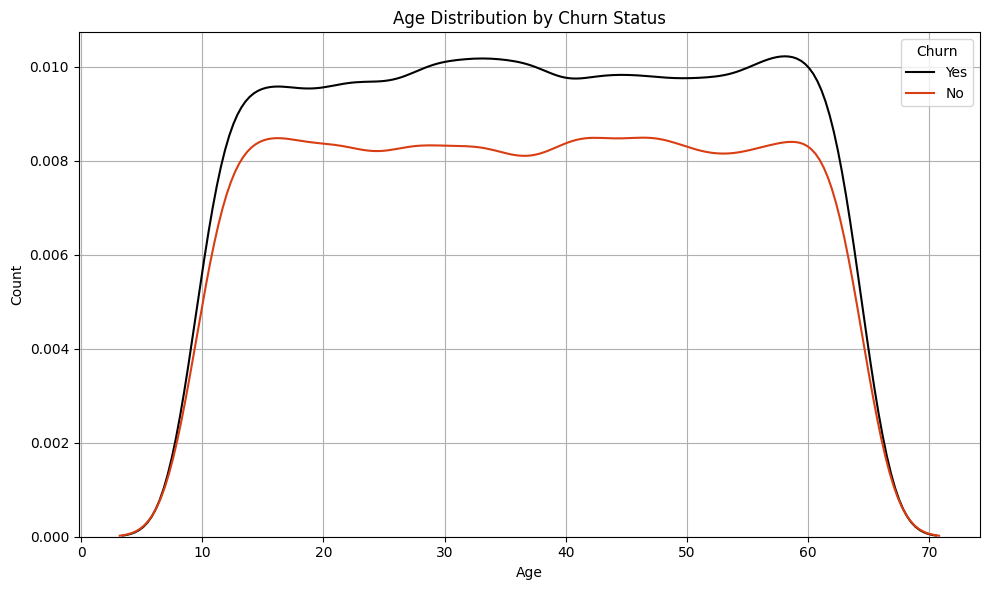

In [35]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='age', hue='churn_risk_score',fill=False, palette=custom_palette)

plt.title('Age Distribution by Churn Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Churn', labels=['Yes', 'No'])
plt.grid(True)
plt.tight_layout()
plt.show()

The age distribution chart indicates that churn is relatively consistent across all age groups, with no specific age range showing notably higher or lower churn rates. This suggests that age is not a strong predictor of churn in this dataset, and other factors such as tenure, usage, or region may provide more valuable insights into customer churn behavior.


We will try and see the relationship between churn risk and tenure days using a KDE plot.

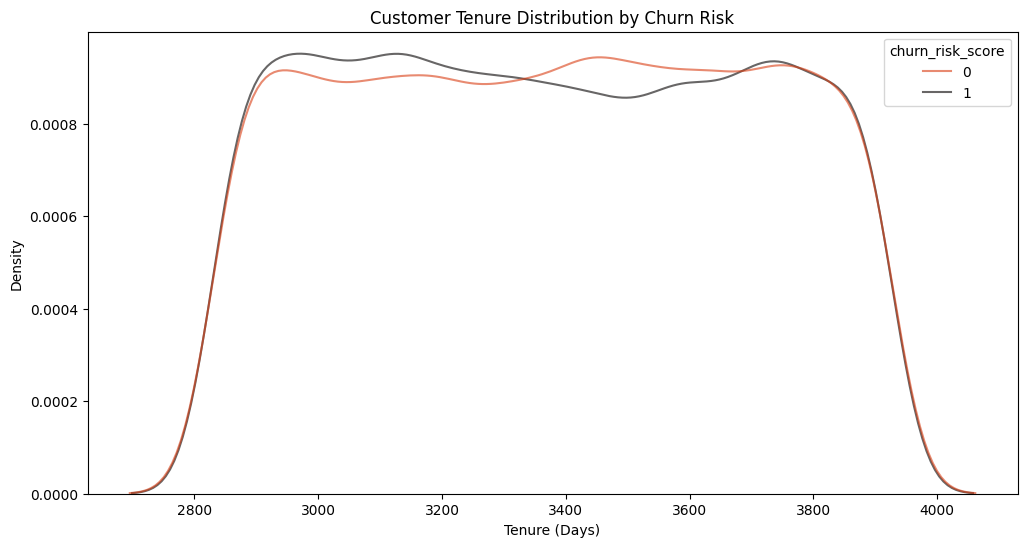

In [36]:
try:

    # Set analysis reference date (today or dataset's max date)
    reference_date = pd.Timestamp.now()

    # Calculate tenure in days
    df['tenure_days'] = (reference_date - df['joining_date']).dt.days

    # Drop rows with invalid/missing dates
    df = df.dropna(subset=['tenure_days'])

    # Plotting
    plt.figure(figsize=(12, 6))
    sns.kdeplot(
        data=df,
        x='tenure_days',
        hue='churn_risk_score',
        palette=custom_palette,
        fill=False,
        common_norm=False,
        alpha=0.6
    )
    plt.title('Customer Tenure Distribution by Churn Risk')
    plt.xlabel('Tenure (Days)')
    plt.ylabel('Density')
    plt.show()

except Exception as e:
    print(f"Error: {e}")
    print("Debug Info:")
    print("- Unique joining_date types:", df['joining_date'].apply(type).unique())
    print("- Sample dates:", df['joining_date'].head())

The KDE plot shows that high churn-risk customers are concentrated between 2,800 and 3,000 days of tenure, while low-risk customers have a wider spread. This suggests that although long-tenured customers are generally loyal, a subset with very long tenure still faces elevated churn risk. The overlap around 3,000–3,200 days highlights that tenure alone is not a strong predictor of churn, emphasizing the need to combine it with behavioral factors (such as complaints) for more accurate churn prediction.


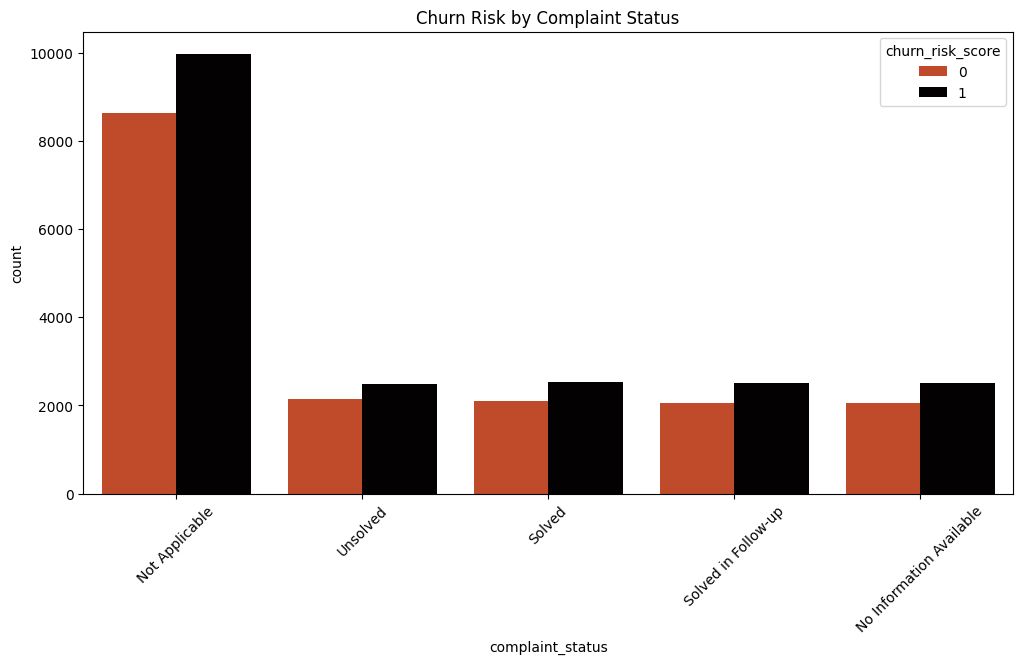

In [37]:
#Checking the complaint status impact using a countplot.
plt.figure(figsize=(12, 6))
sns.countplot(
    data=df, x='complaint_status', hue='churn_risk_score',
    palette=custom_palette, order=df['complaint_status'].value_counts().index
)
plt.title('Churn Risk by Complaint Status')
plt.xticks(rotation=45)
plt.show()

Most customers fall into the "Not Applicable" complaint status, indicating they likely did not raise any complaints. Within this group, however, more customers are at churn risk than not. Interestingly, in all other complaint categories—whether "Unsolved," "Solved," "Solved in Follow-up," or "No Information Available"—the number of churn-risk customers consistently exceeds those not at risk. This suggests that simply having a recorded complaint, regardless of its resolution status, is strongly associated with higher churn risk. Even when complaints are marked as solved, the elevated churn levels point to possible gaps in customer satisfaction or follow-up effectiveness.


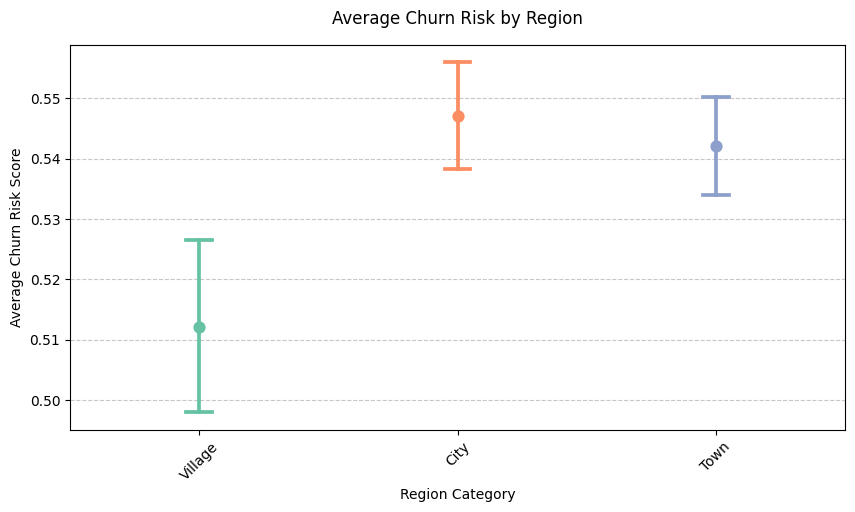

In [38]:
#We will now check the relationship between churn risk score and region.
# point plot creation of region_category vs churn_risk_score
plt.figure(figsize=(10, 5))
sns.pointplot(
    data=df,
    x='region_category',
    y='churn_risk_score',
    errorbar=('ci', 95),
    capsize=0.1,
    palette='Set2'
)
plt.title('Average Churn Risk by Region', pad=15)
plt.xlabel('Region Category')
plt.ylabel('Average Churn Risk Score')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Customers in City regions show the highest average churn risk, followed by those in Towns, while Villages report the lowest. The relatively narrow confidence intervals indicate these differences are statistically significant, particularly between Village and City. This trend suggests that urban customers may be more prone to switching or disengaging, likely due to greater availability of alternatives or higher service expectations. These findings can inform location-based retention strategies tailored to customer needs.


## DATA CLEANING

We begin with the **`preferred_offer_types`** column. The percentage of null values in this column is **0.77%**, which is negligible.  
To maintain data quality and consistency, we will drop all rows containing null values in this column.


In [39]:
df.drop(columns=['security_no', 'last_visit_time', 'referral_id', 'age_group'], inplace=True)
print(df.columns)

Index(['age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score', 'joining_year', 'joining_month',
       'tenure_days'],
      dtype='object')


In [40]:
df.columns

Index(['age', 'gender', 'region_category', 'membership_category',
       'joining_date', 'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'days_since_last_login',
       'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days',
       'points_in_wallet', 'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback', 'churn_risk_score', 'joining_year', 'joining_month',
       'tenure_days'],
      dtype='object')

In [41]:
df.dtypes

age                                      int64
gender                                  object
region_category                         object
membership_category                     object
joining_date                    datetime64[ns]
joined_through_referral                 object
preferred_offer_types                   object
medium_of_operation                     object
internet_option                         object
days_since_last_login                    int64
avg_time_spent                         float64
avg_transaction_value                  float64
avg_frequency_login_days                object
points_in_wallet                       float64
used_special_discount                   object
offer_application_preference            object
past_complaint                          object
complaint_status                        object
feedback                                object
churn_risk_score                         int64
joining_year                             int32
joining_month

In [42]:
#print unique values for each column in a daataframe
def print_unique_values(df):
    for col in df.columns:
        unique_values = df[col].unique()
        print(f"--- Unique values for column: {col} ---")
        print(unique_values)
        print("\n")

print_unique_values(df)

--- Unique values for column: age ---
[18 32 44 37 31 13 21 42 45 25 60 11 34 40 16 57 39 33 30 19 48 43 29 10
 20 61 17 12 52 26 49 24 22 36 58 41 50 23 38 35 28 53 55 59 47 54 62 51
 56 27 14 46 15 64 63]


--- Unique values for column: gender ---
['F' 'M' 'Unknown']


--- Unique values for column: region_category ---
['Village' 'City' 'Town' nan]


--- Unique values for column: membership_category ---
['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']


--- Unique values for column: joining_date ---
<DatetimeArray>
['2017-08-17 00:00:00', '2017-08-28 00:00:00', '2016-11-11 00:00:00',
 '2016-10-29 00:00:00', '2017-09-12 00:00:00', '2016-01-08 00:00:00',
 '2015-03-19 00:00:00', '2016-07-12 00:00:00', '2016-12-14 00:00:00',
 '2016-11-30 00:00:00',
 ...
 '2016-07-31 00:00:00', '2016-07-20 00:00:00', '2016-05-08 00:00:00',
 '2016-04-13 00:00:00', '2015-08-12 00:00:00', '2017-12-23 00:00:00',
 '2016-07-16 00:00:00', '2017

In [43]:
# Dropping 'joining_date' and 'joining_year' columns and use tenure_days instead

columns_to_drop = ['joining_date','joining_year']
df = df.drop(columns=columns_to_drop)

In [44]:
df['points_in_wallet'].unique()

array([781.75     ,         nan, 500.69     , ..., 242.9796255,
       639.51     , 197.2644136], shape=(23700,))

In [45]:
#fill null with mean
df['points_in_wallet'].fillna(df['points_in_wallet'].mean(), inplace=True)

In [46]:
df['preferred_offer_types'].unique()

array(['Gift Vouchers/Coupons', 'Credit/Debit Card Offers',
       'Without Offers', nan], dtype=object)

In [47]:
#drop rows whose preferred_offer_types value is null
df.dropna(subset=['preferred_offer_types'], inplace=True)

In [48]:
#check the shape to see wheather droppiing nulls affected the data size

df.shape

(36704, 21)

In [49]:
df.dropna(inplace=True)

In [50]:
df.isna().sum()

age                             0
gender                          0
region_category                 0
membership_category             0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
joining_month                   0
tenure_days                     0
dtype: int64

In [51]:
#check for columns whose type is not float or int
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64'])
print("Non-numeric columns:")
print(non_numeric_columns.columns)

Non-numeric columns:
Index(['gender', 'region_category', 'membership_category',
       'joined_through_referral', 'preferred_offer_types',
       'medium_of_operation', 'internet_option', 'avg_frequency_login_days',
       'used_special_discount', 'offer_application_preference',
       'past_complaint', 'complaint_status', 'feedback', 'joining_month'],
      dtype='object')


In [52]:
#print unique values for each column in a daataframe
def print_unique_values(df):
    for col in df.columns:
        unique_values = df[col].unique()
        print(f"--- Unique values for column: {col} ---")
        print(unique_values)
        print("\n")

print_unique_values(df)

--- Unique values for column: age ---
[18 32 44 37 31 13 21 45 25 60 11 34 40 16 57 39 33 30 19 48 43 29 10 20
 61 17 12 52 26 49 24 22 36 58 41 50 23 38 35 28 53 55 59 47 54 62 51 56
 42 27 14 46 15 64 63]


--- Unique values for column: gender ---
['F' 'M' 'Unknown']


--- Unique values for column: region_category ---
['Village' 'City' 'Town']


--- Unique values for column: membership_category ---
['Platinum Membership' 'Premium Membership' 'No Membership'
 'Gold Membership' 'Silver Membership' 'Basic Membership']


--- Unique values for column: joined_through_referral ---
['No' '?' 'Yes']


--- Unique values for column: preferred_offer_types ---
['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers']


--- Unique values for column: medium_of_operation ---
['?' 'Desktop' 'Smartphone' 'Both']


--- Unique values for column: internet_option ---
['Wi-Fi' 'Mobile_Data' 'Fiber_Optic']


--- Unique values for column: days_since_last_login ---
[  17   16   14   11   20   23  

In [53]:
# Count rows with "?" in medium_of_operation
print("medium_of_operation '?' count:", (df['medium_of_operation'] == '?').sum())

# Count rows with "?" in joined_through_referral
print("joined_through_referral '?' count:", (df['joined_through_referral'] == '?').sum())


medium_of_operation '?' count: 4518
joined_through_referral '?' count: 4604


In [54]:
#replace those with ? vales to have nan
df['medium_of_operation'].replace('?', np.nan, inplace=True)
df['joined_through_referral'].replace('?', np.nan, inplace=True)

In [55]:
#encode categorical columns
df.isna().sum()

age                                0
gender                             0
region_category                    0
membership_category                0
joined_through_referral         4604
preferred_offer_types              0
medium_of_operation             4518
internet_option                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
joining_month                      0
tenure_days                        0
dtype: int64

In [56]:
df.dropna(inplace=True)

some feature engineering


In [57]:
columns_to_encode =['gender', 'region_category', 'membership_category', 'joined_through_referral',
 'preferred_offer_types', 'medium_of_operation', 'internet_option',
 'used_special_discount', 'offer_application_preference',
 'past_complaint', 'complaint_status', 'feedback']

In [58]:
df.shape

(22883, 21)

In [59]:
#encode categorical columns
df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

In [60]:
# Replace 'Error' with NaN in 'avg_frequency_login_days'
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].replace('Error', np.nan)

# Convert 'avg_frequency_login_days' to numeric, coercing errors
df['avg_frequency_login_days'] = pd.to_numeric(df['avg_frequency_login_days'], errors='coerce')

# Fill remaining NaNs with the mean of the column
df['avg_frequency_login_days'].fillna(df['avg_frequency_login_days'].mean(), inplace=True)

#correlation of all the columns with the target column churn_risk_score
df.corr()['churn_risk_score'].sort_values(ascending=False)

churn_risk_score                               1.000000
membership_category_No Membership              0.442565
avg_frequency_login_days                       0.130552
feedback_Poor Product Quality                  0.100961
feedback_Poor Customer Service                 0.085527
feedback_Too many ads                          0.083835
feedback_Poor Website                          0.079963
preferred_offer_types_Without Offers           0.040676
joined_through_referral_Yes                    0.032337
medium_of_operation_Smartphone                 0.023141
region_category_Town                           0.007091
age                                            0.005392
past_complaint_Yes                             0.004948
joining_month                                  0.003630
complaint_status_Solved in Follow-up           0.003611
internet_option_Mobile_Data                    0.002701
days_since_last_login                          0.001353
complaint_status_Solved                        0

In [61]:
df.dtypes

age                                              int64
days_since_last_login                            int64
avg_time_spent                                 float64
avg_transaction_value                          float64
avg_frequency_login_days                       float64
points_in_wallet                               float64
churn_risk_score                                 int64
joining_month                                    int32
tenure_days                                      int64
gender_M                                          bool
gender_Unknown                                    bool
region_category_Town                              bool
region_category_Village                           bool
membership_category_Gold Membership               bool
membership_category_No Membership                 bool
membership_category_Platinum Membership           bool
membership_category_Premium Membership            bool
membership_category_Silver Membership             bool
joined_thr

In [62]:
df.columns = df.columns.str.replace(" ", "_")

In [63]:
# Dropping Columns with very weak correlation to churn
drop_cols = [
    "gender_M",
    "gender_Unknown",
    "region_category_Town",
    "region_category_Village",
    "internet_option_Mobile_Data",
    "internet_option_Wi-Fi",
    "days_since_last_login",
    "joining_month",
    "past_complaint_Yes",
    "complaint_status_Solved",
    "complaint_status_Unsolved",
    "complaint_status_Not Applicable",
    "complaint_status_Solved in Follow-up"
]

# Drop them from the dataframe (if they exist)
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

print("Remaining columns:", df.columns.tolist())


Remaining columns: ['age', 'avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet', 'churn_risk_score', 'tenure_days', 'membership_category_Gold_Membership', 'membership_category_No_Membership', 'membership_category_Platinum_Membership', 'membership_category_Premium_Membership', 'membership_category_Silver_Membership', 'joined_through_referral_Yes', 'preferred_offer_types_Gift_Vouchers/Coupons', 'preferred_offer_types_Without_Offers', 'medium_of_operation_Desktop', 'medium_of_operation_Smartphone', 'used_special_discount_Yes', 'offer_application_preference_Yes', 'complaint_status_Not_Applicable', 'complaint_status_Solved_in_Follow-up', 'feedback_Poor_Customer_Service', 'feedback_Poor_Product_Quality', 'feedback_Poor_Website', 'feedback_Products_always_in_Stock', 'feedback_Quality_Customer_Care', 'feedback_Reasonable_Price', 'feedback_Too_many_ads', 'feedback_User_Friendly_Website']


In [64]:
df.shape

(22883, 29)

In [65]:
# Assuming df is your cleaned dataframe
X = df.drop("churn_risk_score", axis=1)
y = df["churn_risk_score"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Model training and analysis

In this section, we define a collection of machine learning models that will be used to train and evaluate our dataset. Each model represents a different learning algorithm and approach to classification. The models include Logistic Regression for a baseline linear approach, Random Forest for ensemble-based decision trees, XGBoost and LightGBM for gradient boosting methods optimized for performance and speed, and an MLP (Multi-Layer Perceptron) Neural Network to capture complex nonlinear relationships. These models will later be trained, compared, and evaluated to determine which performs best for our prediction task.

In [70]:
#define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver="liblinear"),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss", random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "MLP Neural Net": MLPClassifier(hidden_layer_sizes=(64,32), max_iter=500, random_state=42)
}

## Training and Evaluating the Model
In this step, each of the defined models is trained using the training dataset and then evaluated on the test dataset. The process involves fitting each model to the training data, making predictions, and computing key performance metrics — Accuracy, Precision, Recall, F1-Score, and ROC-AUC. These metrics provide a comprehensive understanding of how well each model performs, balancing both correctness and robustness across different evaluation perspectives. The results are stored for comparison to help identify the best-performing model.

In [73]:
# 3. Train & evaluate
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan

    results.append([name, acc, prec, rec, f1, roc])


[LightGBM] [Info] Number of positive: 9806, number of negative: 8500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003815 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1375
[LightGBM] [Info] Number of data points in the train set: 18306, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.535671 -> initscore=0.142928
[LightGBM] [Info] Start training from score 0.142928


The output confirm that the model correctly prepared and began training. It detected 9,806 positive and 8,500 negative samples, used 28 features across 18,306 data points, and automatically optimized its multi-threading for faster computation. The model created 1,375 bins for efficient feature processing and initialized training with an average class probability (pavg) of 0.536, corresponding to an initial score of 0.1429.
Overall, these logs indicate that LightGBM successfully initialized and started the training process

Now we display a summary of the evaluation results for all the models using metrics. These metrics include `Accuracy`, `Precision`,`Recall`,`F1 Score` and `ROC-AUC` 

In [74]:
# 4. Results table
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"])
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  Logistic Regression  0.870002   0.905636  0.845432  0.874499  0.949133
1        Random Forest  0.929648   0.923628  0.946982  0.935159  0.973795
2              XGBoost  0.932270   0.928058  0.946982  0.937424  0.972741
3             LightGBM  0.930085   0.930186  0.940049  0.935091  0.974333
4       MLP Neural Net  0.786978   0.908237  0.670065  0.771180  0.906548


We observed that all models performed reasonably well, but the  `Random Forest`, `XGBoost`, and `LightGBM` achieved the highest overall scores across most metrics. Among them, `LightGBM` recorded the highest ROC-AUC (0.9743), indicating excellent ability to distinguish between classes, while `XGBoost` achieved the highest accuracy (0.9323) and F1 Score (0.9374), demonstrating a strong balance between precision and recall. `Random Forest` also performed competitively, showing consistent results with slightly lower but still impressive metrics.

In contrast, `Logistic Regression`, while simpler, showed a solid baseline accuracy of 0.87, confirming that the dataset is linearly separable to some degree. The `MLP Neural Network`, however, underperformed relative to the others, with a noticeably lower recall (0.67) and F1 score (0.77), suggesting difficulty in capturing complex patterns or slower convergence within the chosen architecture.

Overall, gradient boosting models (XGBoost and LightGBM) demonstrated the best predictive power, making them the most suitable candidates for deployment or further fine-tuning in this task.

# Conclusion and recommendation 

### Conclusion 
We successfully developed and evaluated several supervised machine learning models aimed at predicting customer churn risk for Internet Service Providers (ISPs). The primary objective was to leverage behavioral, transactional, and feedback data to identify customers most likely to discontinue their subscriptions. Through comparative analysis, gradient boosting models (XGBoost and LightGBM) emerged as the best-performing classifiers, achieving high accuracy, recall, and ROC-AUC scores. These results demonstrate that machine learning can effectively capture complex relationships between customer behaviors and churn tendencies, providing ISPs with a reliable, data-driven approach to churn prediction.

The analysis also provided valuable insights into customer segments most prone to churn and the predictive factors influencing customer retention, such as usage frequency, billing consistency, and customer feedback sentiment. Such insights are instrumental for understanding the underlying drivers of churn and prioritizing intervention efforts.

### Recomendation 
- Enhance Retention Strategies with Predictive Insights:
ISPs should use model outputs to proactively target high-risk customers with personalized offers, loyalty rewards, or improved customer service before they decide to leave.

- Incorporate Sentiment and Feedback Data Continuously:
Customer feedback and sentiment analysis should be routinely integrated into churn prediction workflows, as they provide deeper insights into dissatisfaction trends and potential service gaps.

- Segment Customers for Tailored Interventions:
By grouping customers based on churn probability and behavioral traits, ISPs can design segment-specific retention campaigns—for instance, offering discounts to price-sensitive users or technical support to those facing service issues.

In conclusion, the deployment of a robust churn prediction model offers ISPs a strategic advantage by enabling timely, evidence-based retention actions. This approach not only reduces revenue loss but also strengthens customer relationships, driving long-term business sustainability in a highly competitive market.

In [64]:
#save the best model
import joblib
best_model = models["LightGBM"]
joblib.dump(best_model, "best_churn_model.pkl")


['best_churn_model.pkl']